# Taii Hirano

## **Which experience level worker is most hired in the mid-level company size?**

Sub Questions:

- Which region tends to have a large company size?
- Which region tends to have a middle company size?
- Which region tends to have a small company size?

Recent popularity in the data science/computer science field suggests the need for data analysis jobs. However, when we graduate from post-secondary education, we face the difficulties of choosing jobs. One of the reasons this problem occurs is that students do not have enough resources to determine their future careers. This problem could be solved by analyzing how the size of the company relates to the salary level. More in detail, we can analyze the relevance between regions and company size and the tendency of hired workers’ experience levels in a specified scale of the company. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid",
              font_scale=1.3, # This scales the fonts slightly higher
             )
# And we're going to remove the top and right axis lines
import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

In [2]:
# load file
df = pd.read_csv('../data/raw/ds_salaries.csv', header=1)
df = df.drop(columns='Unnamed: 0')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### 1. Summary of the dataset
First we explore the dataset using the `describe()` function

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [4]:
df.describe(exclude='number').T

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


### 2. Drop some columns that is not necessary for the research questions
For this tasks, I will drop the `work_year`, `employment_type`, `job_title`, `salary`, `salary_currency`, and `remote_ratio` and name it `df1`.

In [5]:
# drop the unrelated columns
df1 = df.drop(columns=["work_year", "employment_type", "job_title", "salary", "salary_currency", "remote_ratio"])
df1

,experience_level,salary_in_usd,employee_residence,company_location,company_size
0,MI,79833,DE,DE,L
1,SE,260000,JP,JP,S
2,SE,109024,GB,GB,M
3,MI,20000,HN,HN,S
4,SE,150000,US,US,L
...,...,...,...,...,...
602,SE,154000,US,US,M
603,SE,126000,US,US,M
604,SE,129000,US,US,M
605,SE,150000,US,US,M


### 3. Plot the count of each experience level based on the company size.
#### 3.1 Create the dataframes that only contains each company size

In [6]:
# dataframe of Large size company
dfL = df1[df["company_size"] == "L"]
dfL

,experience_level,salary_in_usd,employee_residence,company_location,company_size
0,MI,79833,DE,DE,L
4,SE,150000,US,US,L
5,EN,72000,US,US,L
7,MI,35735,HU,HU,L
8,MI,135000,US,US,L
...,...,...,...,...,...
524,MI,135000,US,US,L
525,SE,177000,US,US,L
550,SE,205300,US,US,L
551,SE,140400,US,US,L


In [7]:
# dataframe of Medium size company
dfM = df1[df["company_size"] == "M"]
dfM

,experience_level,salary_in_usd,employee_residence,company_location,company_size
2,SE,109024,GB,GB,M
12,EN,39916,FR,FR,M
18,EN,5707,IN,IN,M
19,MI,56000,PT,US,M
20,MI,43331,CN,CN,M
...,...,...,...,...,...
601,EN,52000,CA,CA,M
602,SE,154000,US,US,M
603,SE,126000,US,US,M
604,SE,129000,US,US,M


In [8]:
# dataframe of Small size company
dfS = df1[df["company_size"] == "S"]
dfS

,experience_level,salary_in_usd,employee_residence,company_location,company_size
1,SE,260000,JP,JP,S
3,MI,20000,HN,HN,S
6,SE,190000,US,US,S
9,SE,125000,NZ,NZ,S
10,EN,51321,FR,FR,S
...,...,...,...,...,...
510,EN,150000,AU,AU,S
512,EN,65000,US,US,S
513,SE,71444,IE,IE,S
515,MI,48000,RU,US,S


#### 3.2 Select the information needed for plotting

In [9]:
# select the experience level and company size, and group by experience level to count the number of each levels for 3 sizes.
dfL = dfL.loc[:, ["experience_level", "company_size"]].groupby("experience_level").count().reset_index().rename(columns={"company_size":"count"})
dfM = dfM.loc[:, ["experience_level", "company_size"]].groupby("experience_level").count().reset_index().rename(columns={"company_size":"count"})
dfS = dfS.loc[:, ["experience_level", "company_size"]].groupby("experience_level").count().reset_index().rename(columns={"company_size":"count"})

#### 3.3 Plot the counts for each company size

#### RQ1: Which Experience Level of Worker is Most Hired in the Large-Level Company Size?

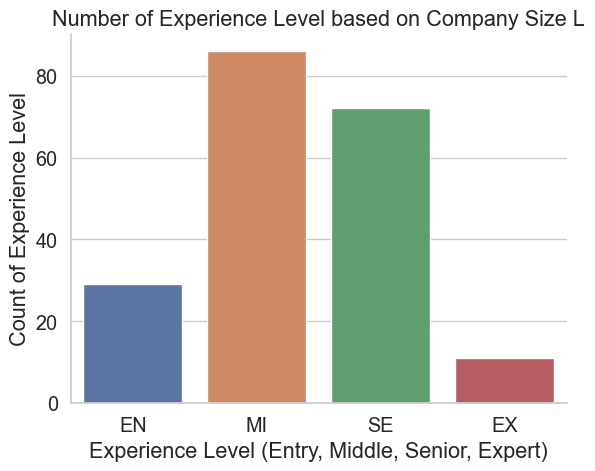

In [10]:
# barplot of the count of experience level for company size L
axL = sns.barplot(data=dfL, x="experience_level", y="count",  order=["EN", "MI", "SE", "EX"])
axL.set(title="Number of Experience Level based on Company Size L", 
        ylabel="Count of Experience Level", 
        xlabel="Experience Level (Entry, Middle, Senior, Expert)"
       )
None

#### RQ2: Which Experience Level of Worker is Most Hired in the Mid-Level Company Size?

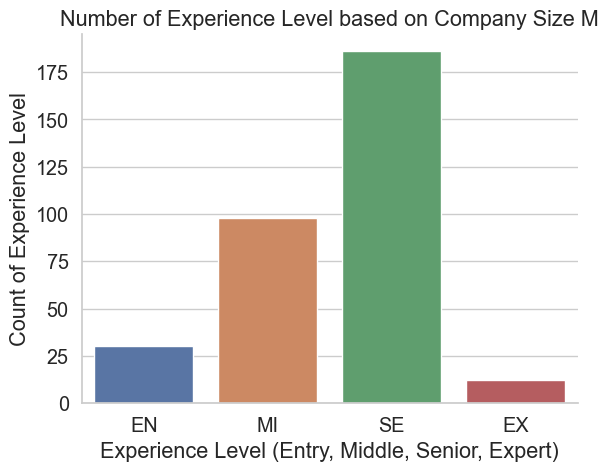

In [11]:
# barplot of the count of experience level for company size M
axM = sns.barplot(data=dfM, x="experience_level", y="count",  order=["EN", "MI", "SE", "EX"])
axM.set(title="Number of Experience Level based on Company Size M", 
        ylabel="Count of Experience Level", 
        xlabel="Experience Level (Entry, Middle, Senior, Expert)"
       )
None

#### RQ3: Which Experience Level of Worker is Most Hired in the Small-Level Company Size?

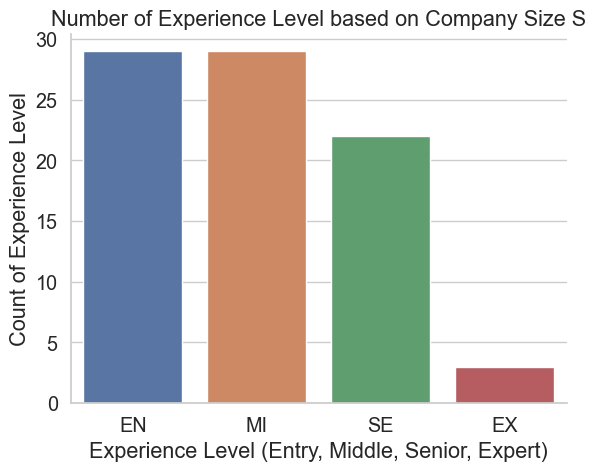

In [12]:
# barplot of the count of experience level for company size S
axS = sns.barplot(data=dfS, x="experience_level", y="count",  order=["EN", "MI", "SE", "EX"])
axS.set(title="Number of Experience Level based on Company Size S", 
        ylabel="Count of Experience Level", 
        xlabel="Experience Level (Entry, Middle, Senior, Expert)"
       )
None

### 4. Summary of Findings
#### 4.1 Number of Experience Level based on company size L (Plot 1. axL)

- The Mid-level experience workers are hired at most company with Size L.

Although the number of workers with Mid-level experience is the most　common in the company size L, population of the workers with Senior-level experience is quite large too. And surprisingly, there were not so many workers with Expert-level.

**Notes: Need more further research.**

#### 4.2 Number of Experience Level based on company size M (Plot 2. axM)

- The Senior-level experience workers are hired at most company with Size M.

The number of workers with Senior-level experiene is the most among four other experience levels in the company size M. I think this is because the company has grew somewhat bigger and has more money to hire the data analysts with higher experience levels.

#### 4.3 Number of Experience Level based on company size S (Plot 3. axS)

- The Entry-level and the Mid-level experience workers (almost the same) are hired at most company with Size S.

The number of workers with Entry-level and the workers with Mid-level are the highest in the company size S and it is almost the same. I think this is becasue the start-up company has not yet earned so much money as in the M size or L size company so they tend to hire workers with lower experience levels with less money.

### 5. Next Analysis Plan

Through this EDA, I found out the most common experience level in each company size.

For the next Milestone Project, I will work on this research question:

- **Which region tends to have a Large-level Company size?**
- **Which region tends to have a Middle-level company size?**
- **Which region tends to have a Small-level company size?**

For the next Milestone Project, I would like to know the relationship between company size based on the region and find out which regioin tends to have Large-level, Middle-level, Small-level conpany size.